In [1]:
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv('raw_data.csv', delimiter=';')
data = data.drop(columns=['Unnamed: 12'])
data.head(100)

,study_hrs,study_hrs_group,study_stress,study_workload,study_eff_lect,study_eff_self,study_satis,leisure_hrs,leisure_sleep_hrs,leisure_sport_hrs,leisure_social_hrs,leisure_satis
0,10.0,10.0,2,10,2,7,9,20.0,9,14.0,20.0,10
1,12.0,4.0,7,2,5,9,6,6.0,5,7.0,8.0,7
2,56.0,8.0,1,4,5,8,7,21.0,7,4.0,7.0,8
3,9.0,1.0,6,3,7,9,8,2.0,7,3.0,0.0,6
4,49.0,21.0,3,6,6,7,7,7.0,7,3.0,6.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,7.0,3,3,8,10,8,7.0,7,1.0,2.0,6
96,14.0,2.0,9,2,3,3,4,20.0,6,2.0,7.0,3
97,44.0,3.0,3,7,8,10,10,1.0,8,7.0,12.0,8
98,16.0,0.0,5,8,6,6,7,35.0,56,0.0,35.0,10


In [64]:
mask = (data['study_hrs'] > 0) & (data['study_hrs'] <= 6)
data.loc[mask, 'study_hrs'] *= 5.5

In [65]:
lower_bound = data.quantile(0.03)
upper_bound = data.quantile(0.97)
data = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [66]:
data = data.fillna(data.mean())
data.shape

(171, 12)

In [69]:
# Keep only the first 70 rows
data_first_100 = data.head(100)
data_first_100.head()

,study_hrs,study_hrs_group,study_stress,study_workload,study_eff_lect,study_eff_self,study_satis,leisure_hrs,leisure_sleep_hrs,leisure_sport_hrs,leisure_social_hrs,leisure_satis
0,10.0,10.0,2,10,2,7.0,9,20.0,9.0,14.0,20.00,10
1,12.0,4.0,7,2,5,9.0,6,6.0,5.0,7.0,8.00,7
2,56.0,8.0,1,4,5,8.0,7,21.0,7.0,4.0,7.00,8
3,9.0,1.0,6,3,7,9.0,8,2.0,7.0,3.0,0.98,6
4,49.0,21.0,3,6,6,7.0,7,7.0,7.0,3.0,6.00,8


In [70]:
data_first_100.to_csv('first_100_data.csv', index=False)

In [49]:
data.to_csv('processed_data_mutation.csv', index=False)

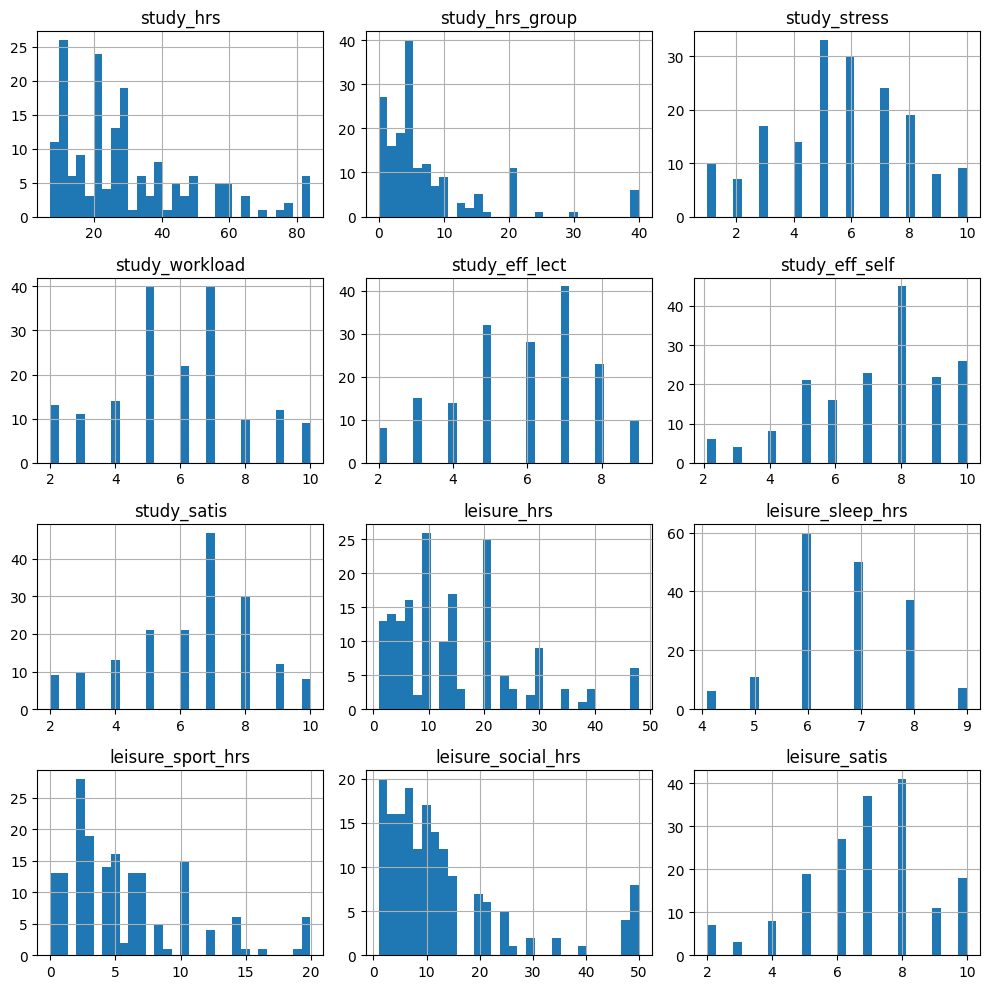

In [47]:
data.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()